<div style="text-align: center"> <span style="font-size:28px;"><b>Rents in Ireland</b> </span></div>

In [21]:
#Importing the libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import ptitprince
from __future__ import print_function 
%matplotlib inline 

In [12]:
#Reading the dataset
df = pd.read_csv(r"C:/Users/Fabiola/Downloads/Ireland_rents.csv")

#Displaying the first 10 rows of the dataset
df.head()

,STATISTIC Label,Quarter,Number of Bedrooms,Property Type,Location,UNIT,VALUE
0,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,Carlow,Euro,805.30
1,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,Carlow Town,Euro,NaN
2,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,"Graiguecullen, Carlow",Euro,NaN
3,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,"Tullow, Carlow",Euro,724.37
4,RTB Average Monthly Rent Report,2007Q4,All bedrooms,All property types,Cavan,Euro,587.92


In [13]:
#Displaying the last 10 rows of the dataset
df.tail()

,STATISTIC Label,Quarter,Number of Bedrooms,Property Type,Location,UNIT,VALUE
802795,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Delgany, Wicklow",Euro,NaN
802796,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Greystones, Wicklow",Euro,NaN
802797,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Kilcoole, Wicklow",Euro,NaN
802798,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Newtownmountkennedy, Wicklow",Euro,NaN
802799,RTB Average Monthly Rent Report,2022Q3,Four plus bed,Other flats,"Rathnew, Wicklow",Euro,NaN


In [14]:
#Checking the size
df.shape

(802800, 7)

In [15]:
#Gettig some information about the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802800 entries, 0 to 802799
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STATISTIC Label     802800 non-null  object 
 1   Quarter             802800 non-null  object 
 2   Number of Bedrooms  802800 non-null  object 
 3   Property Type       802800 non-null  object 
 4   Location            802800 non-null  object 
 5   UNIT                802800 non-null  object 
 6   VALUE               204771 non-null  float64
dtypes: float64(1), object(6)
memory usage: 42.9+ MB


In [16]:
#Statistical description of the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VALUE,204771.0,1011.750505,479.345992,233.67,650.32,901.88,1252.335,6522.48


In [17]:
#Statistical description of the categorical variables
df.describe(include=object).T

,count,unique,top,freq
STATISTIC Label,802800,1,RTB Average Monthly Rent Report,802800
Quarter,802800,60,2007Q4,13380
Number of Bedrooms,802800,5,All bedrooms,160560
Property Type,802800,6,All property types,133800
Location,802800,446,Carlow,1800
UNIT,802800,1,Euro,802800


In [18]:
#Checking duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 7)


In [19]:
#Reviewing missing values
df.isnull().values.any()

True

In [20]:
#Total missing values per column
df.isnull().sum()

STATISTIC Label            0
Quarter                    0
Number of Bedrooms         0
Property Type              0
Location                   0
UNIT                       0
VALUE                 598029
dtype: int64

<AxesSubplot:>

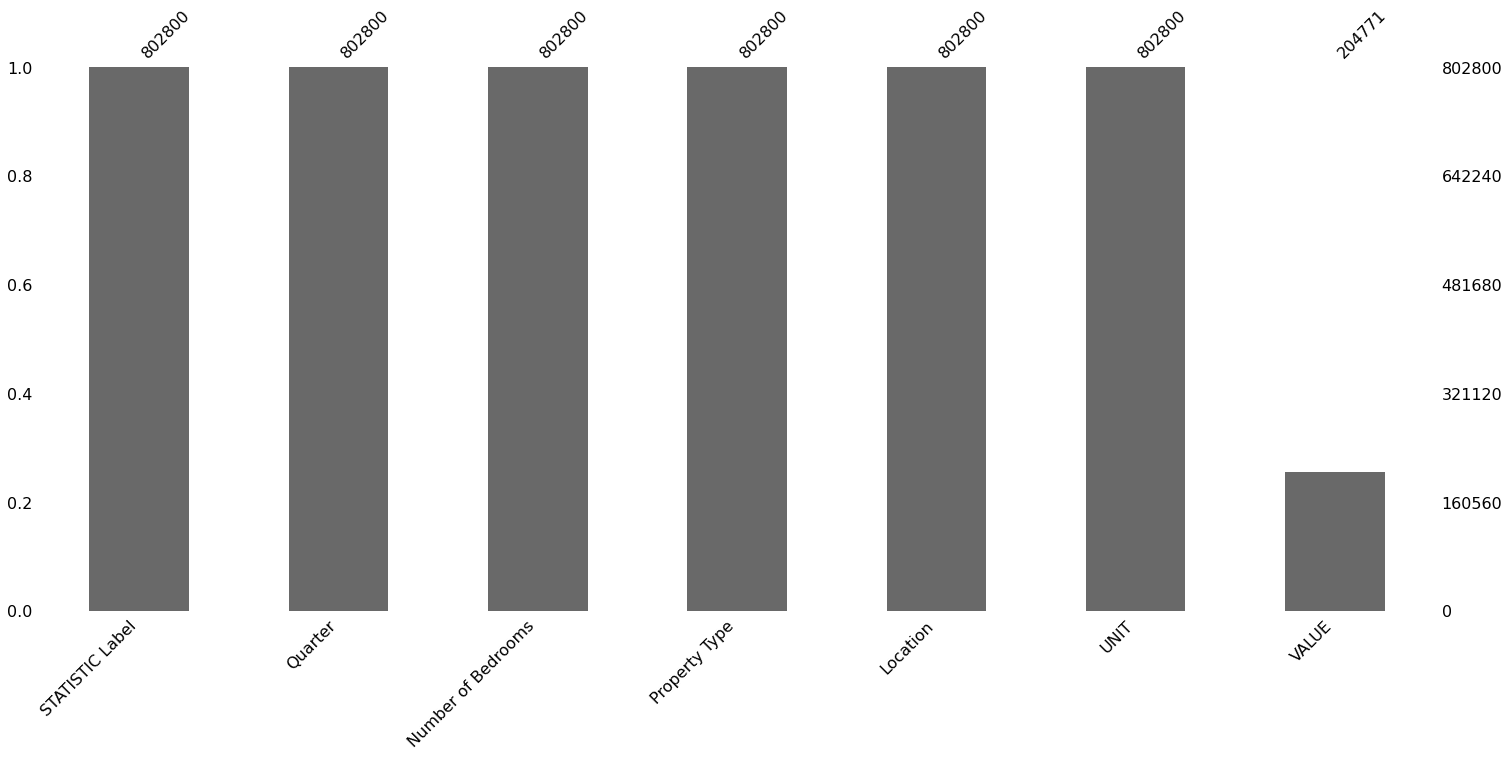

In [22]:
msno.bar(df)

<AxesSubplot:>

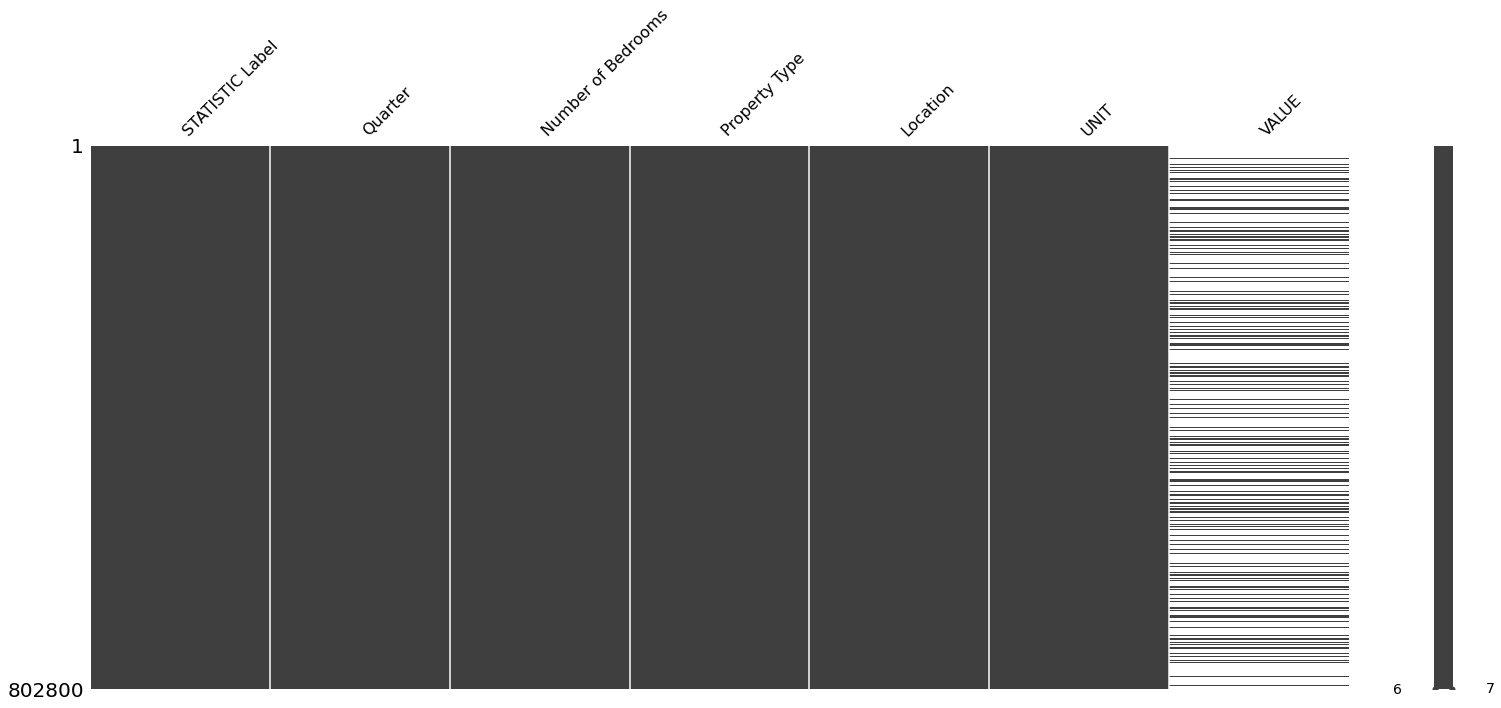

In [23]:
msno.matrix(df)

Next we will analyze the unique values ​​per column.

In [24]:
#Analyzing unique values ​​within the STATISTIC column
df['STATISTIC Label'].unique()

array(['RTB Average Monthly Rent Report'], dtype=object)

In [25]:
#Analyzing unique values ​​within the Quarter column
df['Quarter'].unique()

array(['2007Q4', '2008Q1', '2008Q2', '2008Q3', '2008Q4', '2009Q1',
       '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2', '2010Q3',
       '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1',
       '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3',
       '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1',
       '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3',
       '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
       '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3',
       '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1',
       '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3'],
      dtype=object)

In [26]:
#Analyzing unique values ​​within the Number of Bedrooms column
df['Number of Bedrooms'].unique()

array(['All bedrooms', 'One bed', 'Two bed', 'Three bed', 'Four plus bed'],
      dtype=object)

In [27]:
#Analyzing unique values ​​within the Property Type column
df['Property Type'].unique()

array(['All property types', 'Detached house', 'Semi detached house',
       'Terrace house', 'Apartment', 'Other flats'], dtype=object)

In [28]:
#Analyzing unique values ​​within the Location column
df['Location'].unique()

array(['Carlow', 'Carlow Town', 'Graiguecullen, Carlow', 'Tullow, Carlow',
       'Cavan', 'Cavan Town', 'Bailieborough, Cavan',
       'Ballyconnell, Cavan', 'Ballyjamesduff, Cavan', 'Belturbet, Cavan',
       'Cootehill, Cavan', 'Kingscourt, Cavan', 'Virginia, Cavan',
       'Clare', 'Ennis, Clare', 'Killaloe, Clare', 'Kilrush, Clare',
       'Newmarket-On-Fergus, Clare', 'Shannon, Clare',
       'Sixmilebridge, Clare', 'Cork', 'Cork City', 'Ballincollig, Cork',
       'Ballintemple, Cork', 'Ballinure, Cork', 'Bandon, Cork',
       'Bantry, Cork', 'Bishopstown, Cork', 'Blackpool, Cork',
       'Blackrock, Cork', 'Blarney, Cork', 'Carrigaline, Cork',
       'Carrigtwohill, Cork', 'Castlemartyr, Cork', 'Charleville, Cork',
       'Clonakilty, Cork', 'Cloyne, Cork', 'Cobh, Cork',
       'Crosshaven, Cork', 'Douglas, Cork', 'Dunmanway, Cork',
       'Fermoy, Cork', 'Frankfield, Cork', 'Glanmire, Cork',
       'Kanturk, Cork', 'Kinsale, Cork', 'Macroom, Cork', 'Mallow, Cork',
       'Midl